![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/component_examples/classifiers/sarcasm_classification.ipynb)


# Sarcasm Classification with NLU
![](https://camo.githubusercontent.com/0a466b438cfd4f2bc5248f5029cde1fb66dbdefc/68747470733a2f2f6d656d657362616d732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31312f7368656c646f6e2d7361726361736d2d6d656d652e6a7067)             
Knowing the difference between when somebody is serious or sarcastic can yield inisghts about users of social media plattforms like  Twitter, Reddit, Facebook, etc..     


NLU provides a classifier pretrained on [sarcasm dataset](https://arxiv.org/abs/1704.05579) consisting of 1.3 million sarcastic comments from the internet forum Reddit. 

The Sarcasm classifier model uses universal sentence embeddings and is trained with the classifierdl algorithm provided by Spark NLP.            
https://www.kaggle.com/danofer/sarcasm




In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-04 00:20:18--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-04 00:20:18 (45.7 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 70kB/s 
     |████████████████████████████████| 153kB 52.0MB/s 
     |████████████████████████████████| 204kB 23.9MB/s 
     |████████████████████████████████| 204kB 46.4MB/s 


In [ ]:
# Download the dataset 
! wget -N https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv -P /tmp

--2021-05-04 00:21:56--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/sarcasm/train-balanced-sarcasm.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.17.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.17.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255268960 (243M) [text/csv]
Saving to: ‘/tmp/train-balanced-sarcasm.csv’

train-balanced-sarc 100%[===================>] 243.44M  41.1MB/s    in 5.8s    

2021-05-04 00:22:02 (41.8 MB/s) - ‘/tmp/train-balanced-sarcasm.csv’ saved [255268960/255268960]



In [ ]:
import nlu
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
sarcasm_pipe.predict('gotta love the teachers who give exams on the day after halloween')

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sarcasm_confidence_confidence,document,origin_index,sarcasm,text,sentence_embedding_tfhub_use,sentence
0,[0.99999106],gotta love the teachers who give exams on the ...,8589934592,[sarcasm],gotta love the teachers who give exams on the ...,"[[-0.05071105435490608, 0.038035523146390915, ...",[gotta love the teachers who give exams on the...


In [ ]:
import pandas as pd
df = pd.read_csv('/tmp/train-balanced-sarcasm.csv')


In [ ]:
# Detect sentences automatically and generates a 1 to S mapping for every row, where S is the amount of Sentences per row
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
df['text'] = df['comment']
sarcasm_predictions = sarcasm_pipe.predict(df['text'].iloc[0:1000])
sarcasm_predictions

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sarcasm_confidence_confidence,document,origin_index,sarcasm,text,sentence_embedding_tfhub_use,sentence
0,[0.999997],NC and NH.,0,[normal],NC and NH.,"[[-0.06570463627576828, -0.03522052243351936, ...",[NC and NH.]
1,[0.99998283],You do know west teams play against west teams...,1,[normal],You do know west teams play against west teams...,"[[-0.0254225991666317, 0.05448468029499054, -0...",[You do know west teams play against west team...
2,[0.9997936],"They were underdogs earlier today, but since G...",2,[normal],"They were underdogs earlier today, but since G...","[[-0.0035701016895473003, -0.03012475557625293...","[They were underdogs earlier today, but since ..."
3,[0.9942914],"This meme isn't funny none of the ""new york ni...",3,[normal],"This meme isn't funny none of the ""new york ni...","[[0.06464719027280807, -0.023972544819116592, ...","[This meme isn't funny none of the ""new york n..."
4,[0.999838],I could use one of those tools.,4,[normal],I could use one of those tools.,"[[0.028676817193627357, 0.0199710875749588, 0....",[I could use one of those tools.]
...,...,...,...,...,...,...,...
995,[0.99998844],Have you bound your pistol on mouse wheel?,8589935087,[normal],Have you bound your pistol on mouse wheel?,"[[-0.04123315587639809, 0.049579471349716187, ...",[Have you bound your pistol on mouse wheel?]
996,[0.99159735],Imagine showing that to someone a little over ...,8589935088,[normal],Imagine showing that to someone a little over ...,"[[0.0263528935611248, -0.06056991219520569, -0...",[Imagine showing that to someone a little over...
997,[0.9997123],I wish Schumer and Reid had not endorsed Keith...,8589935089,[normal],I wish Schumer and Reid had not endorsed Keith...,"[[0.07649341225624084, 0.05448545515537262, -0...",[I wish Schumer and Reid had not endorsed Keit...
998,[0.9423373],"yeah, god forbid jesse look out for his fans b...",8589935090,[normal],"yeah, god forbid jesse look out for his fans b...","[[0.049849480390548706, -0.054164644330739975,...","[yeah, god forbid jesse look out for his fans ..."


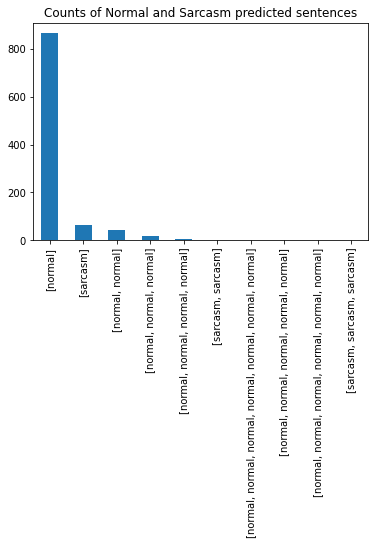

In [ ]:
sarcasm_predictions.sarcasm.value_counts().plot.bar(title='Counts of Normal and Sarcasm predicted sentences')

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


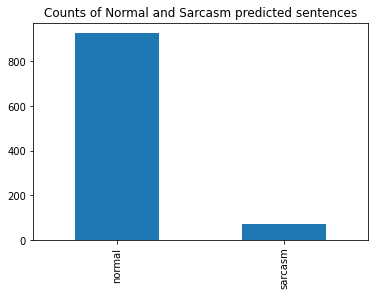

In [ ]:
# 1 to 1 mapping of row to label via outputlevel == document
sarcasm_pipe  = nlu.load('en.classify.sarcasm')
df['text'] = df['comment']
sarcasm_predictions = sarcasm_pipe.predict(df['text'].iloc[0:1000], output_level='document')
sarcasm_predictions.sarcasm.value_counts().plot.bar(title='Counts of Normal and Sarcasm predicted for each row')